<a href="https://colab.research.google.com/github/ssssihoon/WE_IT/blob/main/Data_analysis/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install pyreadstat

In [3]:
#폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [5]:
# df
raw_welfare = pd.read_spss("/content/drive/MyDrive/Colab Notebooks/WE_IT_DATA_ANALYSIS/Koweps_hpwc14_2019_beta2.sav")

welfare = raw_welfare.copy()

In [6]:
# 변수 보기편하게 변환
welfare = welfare.rename(
    columns = {'h14_g3' : 'sex',
               'h14_g4' : 'birth',
               'h14_g10' : 'marriage_type',
               'h14_g11' : 'religion',
               'p1402_8aq1' : 'income',
               'h14_eco9' : 'code_job',
               'h14_reg7' : 'code_region'}
)

# 지역별 수입 관계

In [7]:
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울', '수도권', '부산/경남/울산', '대구/경북', '대전/충남', '강원/충북', '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [8]:
welfare_region = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare_region['region'].head()

0    서울
1    서울
2    서울
3    서울
4    서울
Name: region, dtype: object

In [9]:
'''
지역별 평균수입표
지역별로 그룹화 -> 수입 합산이 나올 것임.
'''
welfare_region_I = welfare_region.groupby('region', as_index = False).agg(mean_income = ('income', 'mean'))
welfare_region_I

,region,mean_income
0,강원/충북,251.492492
1,광주/전남/전북/제주도,238.434389
2,대구/경북,247.462069
3,대전/충남,299.073892
4,부산/경남/울산,270.336066
5,서울,282.818299
6,수도권,276.638352


<Axes: xlabel='region', ylabel='mean_income'>

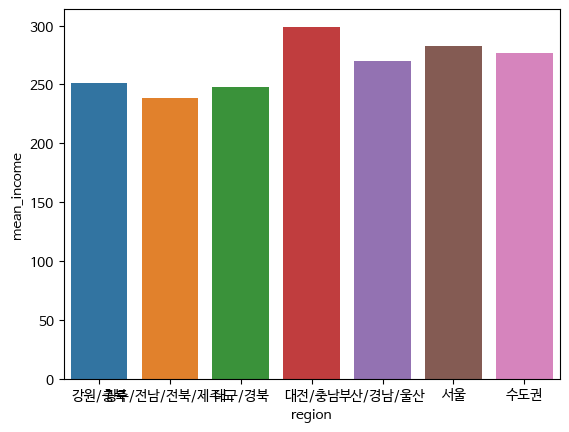

In [11]:
sns.barplot(data = welfare_region_I, x = 'region', y = 'mean_income')

In [13]:
welfare_region_I = welfare_region_I.rename(columns = {'mean_income' : '평균수입'})

<Axes: xlabel='평균수입', ylabel='region'>

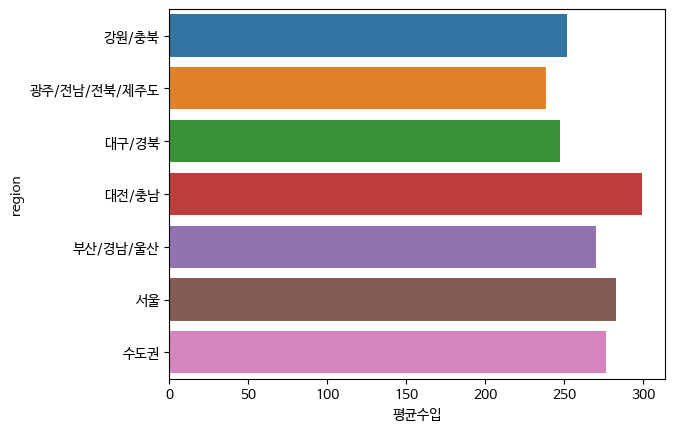

In [14]:
# 한글겹침현상으로 인한 가로배열

sns.barplot(data = welfare_region_I, y = 'region', x = '평균수입')

# 성별에 따른 이혼빈도

성별

In [15]:
welfare['sex'].dtypes

dtype('float64')

In [16]:
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [17]:
import numpy as np

In [18]:
welfare['sex'] = np.where(welfare['sex'] == 1.0, 'male', 'female')

In [19]:
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

이혼율

In [22]:
welfare['marriage_type'].dtypes

dtype('float64')

In [24]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

In [25]:
welfare['marriage'] = np.where(welfare['marriage_type'] == 3, 'divorce', 'etc')
welfare['marriage'].head()

0        etc
1        etc
2    divorce
3        etc
4        etc
Name: marriage, dtype: object

In [54]:
sex_div = welfare.query('marriage == "divorce"').groupby('sex', as_index = False)['marriage'].value_counts()
sex_div.head()

,sex,marriage,count
0,female,divorce,370
1,male,divorce,319


<Axes: xlabel='sex', ylabel='count'>

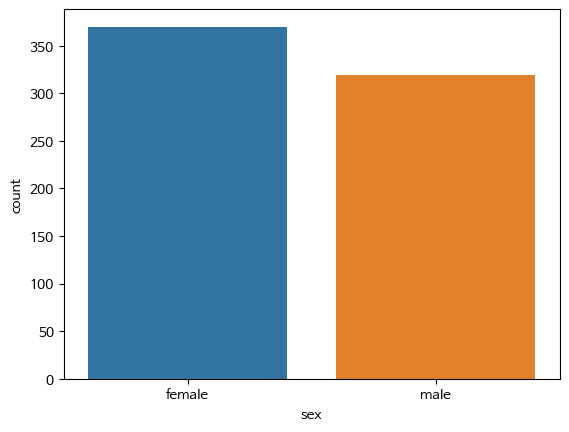

In [60]:
sns.barplot(data = sex_div, x = 'sex', y ='count')